In [1]:
conda list

# packages in environment at /home/e.conway/.conda/envs/MyEnv:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2021.11                  py37_0  
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
affine                    2.3.0                    pypi_0    pypi
aiodns                    3.0.0                    pypi_0    pypi
aiohttp                   3.8.1                    pypi_0    pypi
aiohttp-client-cache      0.5.2                    pypi_0    pypi
aiosignal                 1.2.0                    pypi_0    pypi
aiosqlite                 0.17.0                   pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda                  custom                   py37_1  
anaconda-client           1.9.0            py37h06a4308_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     2.2.0            py37h06a4

In [1]:
from simplekml import (Kml, AltitudeMode,Color)
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from palettable import colorbrewer
import numpy.ma as ma
import matplotlib as mpl
mpl.cm.get_cmap
import matplotlib.cm as cm
from sys import exit
from tqdm import tqdm


def make_kml(lon,lat,alt,colorrange,outname):
    kml = Kml()
    npnts = len(lon)
    for i in tqdm(range(npnts)):
        #pnt = kml.newpoint(coords=[(lon[i],lat[i],alt[i])],gxaltitudemode='relativeToSeaFloor') 
        pnt = kml.newpoint(coords=[(lon[i],lat[i],alt[i])],altitudemode='absolute') 
        #pnt.style.labelstyle.color = Color.rgb(int(colorrange[i]),0,0,255)
        pnt.style.iconstyle.color = Color.rgb(int(colorrange[i]),0,0,int(colorrange[i]))
        pnt.style.iconstyle.icon.href = 'http://earth.google.com/images/kml-icons/track-directional/track-none.png'
    kml.save(outname)

In [2]:
import cartopy.crs as crs
import matplotlib.pyplot as plt
import netCDF4 as nc4
import cartopy.feature as cfeature
import numpy as np
import matplotlib.ticker as mticker
from sys import exit
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
file = '/scratch/e.conway/GEDI/MyResults/Combined_Congo_2021_South.nc'
with nc4.Dataset(file,'r') as f:
    lon=f['Lon'][:]
    lat=f['Lat'][:]
    msl=f['ElevMSL'][:]
    beam=f['BeamNumber'][:]

lon1_bound = 25.42#25.67
lon2_bound = 25.44#25.675  
lat1_bound = -10.715#-10.52
lat2_bound = -10.69#-10.517
    
idx = np.where((lon>lon1_bound) &  (lon <lon2_bound) & (lat>lat1_bound) & (lat<lat2_bound) )[0]
print(idx.shape)
lon=lon[idx]
lat=lat[idx]
msl=msl[idx]
beam=beam[idx]



(267,)


In [4]:
import pandas as pd
x = pd.read_csv('/scratch/e.conway/GEDI/Analysis/cod_mines_curated_all_opendata_p_ipis.csv',usecols=['longitude', 'latitude'])
lon_mine = x['longitude']
lat_mine = x['latitude']
idx = np.where((lon_mine>lon1_bound) &  (lon_mine <lon2_bound) & (lat_mine>lat1_bound) & (lat_mine<lat2_bound) )[0]
print(idx,idx.shape)
lon_mine=lon_mine[idx]
lat_mine=lat_mine[idx]
print(lon_mine)
print(lat_mine)
    

[4516 4517] (2,)
4516    25.427089
4517    25.425922
Name: longitude, dtype: float64
4516   -10.703157
4517   -10.693808
Name: latitude, dtype: float64


In [3]:
#Make a .kml
fname = 'Congo_25p42E_10p69S.kml'
vmax = np.nanmax(msl)
color = 255*msl.flatten() / vmax
make_kml(lon,lat,msl,color,fname)

100%|██████████| 267/267 [00:00<00:00, 6844.60it/s]


-10.716 25.419
-10.689 25.441000000000003


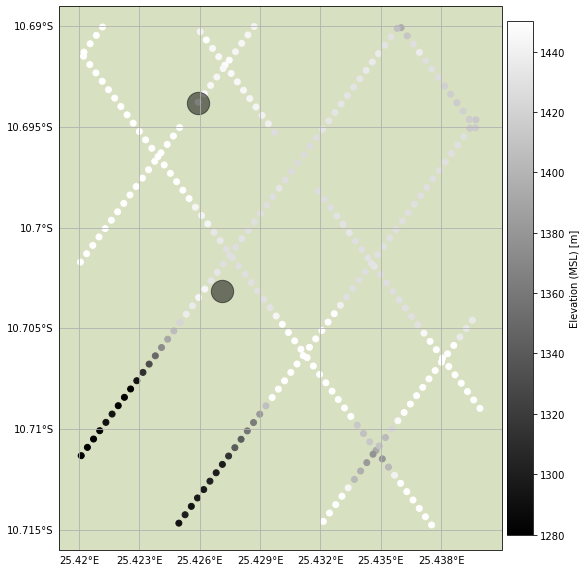

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

#lat1, lon1, lat2, lon2 = -90, -180, 90,180

nmin=0
nmax=len(lon)-1

lat1= min(lat1_bound,lat2_bound)-0.001
lon1= min(lon1_bound,lon2_bound)-0.001
lat2= max(lat1_bound,lat2_bound)+0.001
lon2= max(lon1_bound,lon2_bound)+0.001

print(lat1,lon1)
print(lat2,lon2)
exit

#plt.plot(msl)
#plt.show()
#exit

#lat1, lon1, lat2, lon2 = -20, 20, -10, 31
ax.set_extent([lon1, lon2, lat1, lat2], crs=crs.PlateCarree())

im = ax.scatter(x=lon, y=lat,c=msl,cmap='gray',vmin=1280,vmax=1450,transform=crs.PlateCarree(),alpha=1)
#ax.scatter(x=25.349472,y=-10.762667,s=20,transform=crs.PlateCarree())

ax.scatter(x=lon_mine,y=lat_mine,s=500,color='black',transform=crs.PlateCarree(),alpha=0.5)

# Create colourbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046,
                    pad=0.01, label='Elevation (MSL) [m]',
                    orientation="vertical")


# Sort out gridlines and their density
xticks_extent = list(np.arange(lon1, lon2, 2))
yticks_extent = list(np.arange(lat1, lat2, 1))

gl = ax.gridlines(linewidths=0.1)
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.show()
#plt.savefig('Congo.png',dpi=500)
#plt.close()